<a href="https://colab.research.google.com/github/TahaVahedi/VerticalHorizontal/blob/main/vertical_horizontal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import modules

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load kaggle json api key 
(and get the dataset)

In [2]:
from IPython.display import clear_output
!pip install --upgrade kaggle
clear_output()
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [3]:
!kaggle datasets download -d tahavahedi/verticalhorizontal

100% 1.11G/1.11G [00:10<00:00, 98.3MB/s]
100% 1.11G/1.11G [00:10<00:00, 116MB/s] 


In [4]:
!unzip -qx verticalhorizontal.zip

# model training

In [6]:
width = 600
height = 600
IMGsize = (width, height)

In [7]:
TRAINING_DIR = '/content/dataset/train'
train_datagen = ImageDataGenerator(rescale=1 / 255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    target_size=IMGsize
)

VALIDATION_DIR = '/content/dataset/test'
validation_datagen = ImageDataGenerator(rescale=1 / 255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    target_size=IMGsize
)


Found 7774 images belonging to 2 classes.
Found 864 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential()
#CNN
model.add(tf.keras.layers.Conv2D(32,3, activation='relu', input_shape=(width,height,3)))
model.add(tf.keras.layers.Conv2D(32,3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))

model.add(tf.keras.layers.Conv2D(16,3, activation='relu'))
model.add(tf.keras.layers.Conv2D(16,3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))

model.add(tf.keras.layers.Conv2D(8,3, activation='relu'))
model.add(tf.keras.layers.Conv2D(8,3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))

model.add(tf.keras.layers.Flatten())
# ANN
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))





model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 598, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 596, 596, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 16)      4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 194, 194, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 8)         1

In [12]:
optim = tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
print('Num Params : ',model.count_params())
history = model.fit(
    train_generator,
    epochs=5,
    verbose=1,
    validation_data=validation_generator
)

Num Params :  2781906
Epoch 1/5
243/243 [==============================] - 310s 1s/step - loss: 0.2686 - accuracy: 0.8743 - val_loss: 0.1956 - val_accuracy: 0.8981
Epoch 2/5
243/243 [==============================] - 260s 1s/step - loss: 0.1533 - accuracy: 0.9383 - val_loss: 0.1664 - val_accuracy: 0.9259
Epoch 3/5
243/243 [==============================] - 260s 1s/step - loss: 0.1212 - accuracy: 0.9536 - val_loss: 0.1839 - val_accuracy: 0.9317
Epoch 4/5
243/243 [==============================] - 260s 1s/step - loss: 0.1127 - accuracy: 0.9582 - val_loss: 0.1568 - val_accuracy: 0.9317
Epoch 5/5
243/243 [==============================] - 260s 1s/step - loss: 0.0830 - accuracy: 0.9699 - val_loss: 0.1297 - val_accuracy: 0.9421


# model save & evaluate

Text(0.5, 1.0, 'Training and validation loss')

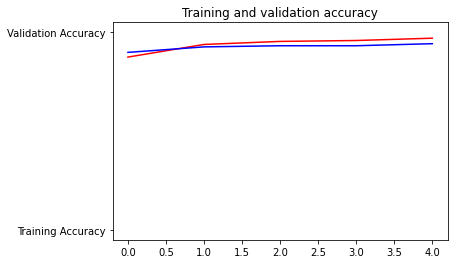

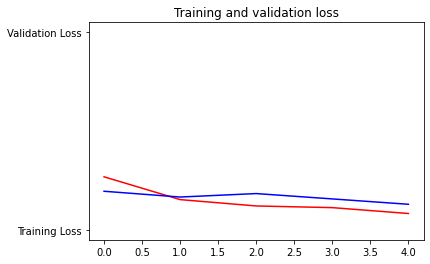

In [14]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [15]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=IMGsize)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.
    classes = model.predict(x, batch_size=10)
    print(classes)


Saving h.jpg to h.jpg
[[0.9309631  0.06903691]]
